In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgb_model_funcs import prepare_training_testing_data, perform_grid_search, train_and_evaluate_model, load_params_from_file
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load and preprocess data
filepath = "data.csv"  # Update the path accordingly
x_train, y_train, x_test, y_test = prepare_training_testing_data(filepath)


In [3]:
# # Perform Grid Search
# best_model, best_params = perform_grid_search(x_train, y_train)


# Load best parameters and train the model
print("Best parameters found by grid search:")
params = load_params_from_file()
print(params)



Best parameters found by grid search:
{'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.15, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 300, 'objective': 'reg:squarederror', 'subsample': 0.8}


In [4]:
model, metrics = train_and_evaluate_model(x_train, y_train, x_test, y_test, params)
print("Evaluation Metrics:")
print(metrics)


Evaluation Metrics:
{'R-squared': 0.7827689997231493, 'Mean Absolute Error': 37163.32104885057, 'Root Mean Squared Error': 368090.6225765664}


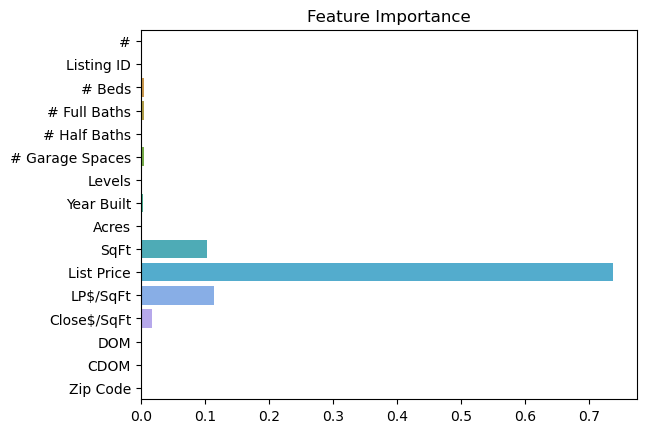

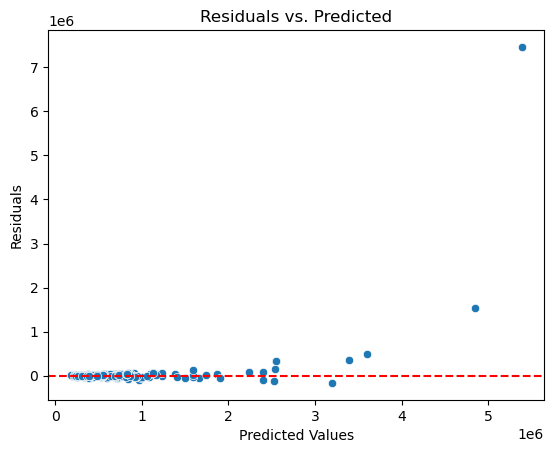

In [5]:
# Feature importance or other diagnostics
importances = model.feature_importances_
features = x_train.columns
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()

# Residual plot
predictions = model.predict(x_test)
residuals = y_test - predictions
sns.scatterplot(x=predictions, y=residuals)
plt.title("Residuals vs. Predicted")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


In [6]:
#Trial 3: Exclude Condos, Treat Levels as Categorical
#This assumes specific preprocessing to handle "levels" and exclude condos which should be reflected in your data preparation phase.

# Assuming data preprocessing is adjusted in the data loading function
x_train_3, y_train_3, x_test_3, y_test_3 = prepare_training_testing_data(filepath, include_condos=False, treat_levels_as_categorical=True)
model_3, metrics_3 = train_and_evaluate_model(x_train_3, y_train_3, x_test_3, y_test_3, params)
print("Trial 3 Metrics:", metrics_3)


TypeError: prepare_training_testing_data() got an unexpected keyword argument 'include_condos'

In [ ]:
#Trial 4: Exclude Condos and Levels
# Data should be preprocessed accordingly before this step
x_train_4, y_train_4, x_test_4, y_test_4 = prepare_training_testing_data(filepath, include_levels=False, include_condos=False)
model_4, metrics_4 = train_and_evaluate_model(x_train_4, y_train_4, x_test_4, y_test_4, best_params_2)
print("Trial 4 Metrics:", metrics_4)


In [ ]:
#Trial 5: Exclude Condos and Levels, Remove SqFt Outliers
# Assuming additional preprocessing for removing outliers
x_train_5, y_train_5, x_test_5, y_test_5 = prepare_training_testing_data(filepath, remove_sqft_outliers=True)
model_5, metrics_5 = train_and_evaluate_model(x_train_5, y_train_5, x_test_5, y_test_5, best_params_2)
print("Trial 5 Metrics:", metrics_5)
